<a href="https://colab.research.google.com/github/christianhbye/bayesian-analysis/blob/main/HW1_288.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1

## <em>Intro to Statistics</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br><br>
<span style="color:blue"> Problems are directly taken from MacKay Chapter 3 (http://www.inference.org.uk/itprnn/book.pdf). We recommend you to read Chapter 3 before starting HW1.  </span> <br>

***

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad, fixed_quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Quick tutorial: Numerical Integration (using scipy's quad function)

##### Example - Harmonic Oscillator

The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$

<span style="color:blue"> Q1. Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$. Then the below cell shows a function that calculates the period for a given amplitude. </span>



In [2]:
def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return np.sqrt(8)*(V(a) - V(x))**-0.5

<span style="color:blue"> Q2. Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'? </span>

<span style="color:blue"> Q3. Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique) </span>

In [3]:
# Using fixed_quad
a = 2

#N = 100
n = 100
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))
#N = 1000
n = 1000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))
#N = 10000
n = 10000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))

# Using quad
tquad = quad(timep, 0, a, args = (a, ))
print('\nInbuilt Gaussian Quadrature gives time period = ', tquad[0], ' with error = ', tquad[1])


For n = 100, the time period is 1.848, with error = 3.055e-03

For n = 1000, the time period is 1.853, with error = 3.076e-04

For n = 10000, the time period is 1.854, with error = 3.078e-05

Inbuilt Gaussian Quadrature gives time period =  1.8540746773017016  with error =  2.006794730391448e-10


***

#### Problem 1 - Inferring a Decay Constant

Unstable particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$. Decay events can be observed only if they occur in a window extending from $x$ = 1cm to $x$ = 20cm. $N$ decays are observed at locations {$x_1$, ... , $x_N$}. What is $\lambda$? <br>
![alt text](https://drive.google.com/uc?id=1zlovMrjhFqW9Vz5dFoElWZpBFMWUp-Dq)

Given $\lambda$, the probability of observing a particle at a distance $x$ is:<br>

\begin{equation}
P(x\ |\ \lambda) =  
\begin{cases}
\frac{1}{\lambda}e^{-x/\lambda}\big/\ Z(\lambda)\ \ \ \ \ \ a < x < b \\
0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{otherwise}
\end{cases}
\end{equation}

where
$$ Z(\lambda) = \int_a^b dx \frac{1}{\lambda}e^{-x/\lambda} = \big( e^{-a/\lambda} - e^{-b/\lambda} \big). $$
Here, $a = 1,\ b = 20$.
<br> <br>
<span style="color:blue"> 1. Write a function for $Z(\lambda)$. Then, use it to write another function for $P(x|\lambda)$. </span> <br>
<br>
Henceforth, we refer to $\lambda$ as $L$ (for the sake of simplicity).<br>
<br>
Check if your function can return a correct value if either $x$ or $L$ is a 2D array. Say $x$ is a scalar, and $L$ is a vector with $N$ elements. If you calculate the product $x*L$, the dimension of $x$ is stretched to $N \times 1$ in order to match that of $L$ ([broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)). If $x$ and $L$ are both vectors, then they must have the same dimensions to perform arithmetic operations on them ($x*L$, $x$+$L$, $x$/$L$, etc).

In [4]:
a = 1  # cm
b = 20  # cm


def Z(L):
  """
  Function for Z(lambda)
  """
  return np.exp(-a/L) - np.exp(-b/L)

def likelihood(x, L):
  """
  Function for P(x | lambda), the likelihood
  """
  return 1/L * np.exp(-x/L) / Z(L)


# test with x being a vector
x = 5 * np.arange(1, 4)
L = 1
lh = likelihood(x, L)

print("x is vector, L is scalar")
print(f"x = {x}")
print(f"L = {L}")
print(f"P(x|L) = {lh}")

# test with L being a vector
x = 10
L = 3 * np.arange(1, 6)
lh = likelihood(x, L)

print("\n-----\n")
print("L is vector, x is scalar")
print(f"x = {x}")
print(f"L = {L}")
print(f"P(x|L) = {lh}")

x is vector, L is scalar
x = [ 5 10 15]
L = 1
P(x|L) = [1.83156390e-02 1.23409805e-04 8.31528724e-07]

-----

L is vector, x is scalar
x = 10
L = [ 3  6  9 12 15]
P(x|L) = [0.01662522 0.03882458 0.04650774 0.04953236 0.05094107]


<span style="color:blue"> <i> 2. Plot $P(x|\lambda)$ as a function of $x$ for $\lambda = 2, 5, 10$. Make sure to label each plot. </i></span>

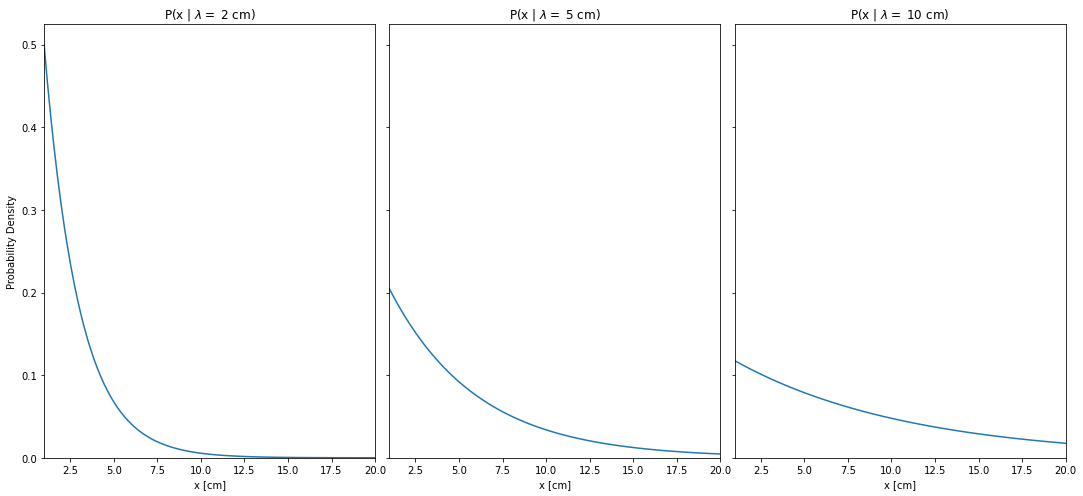

In [5]:
# Create arrays for x and L.
Ls = [2, 5, 10]
x = np.linspace(a, b, num=100)
# Plot the probability desity as a function of x for each lambda.
# Hint: You can use a for-loop and make a plot for each element of an array L. (But you don't
#have to do it in this way.)
# Hint2: You should label each plot. To do this in a for-loop, you should remember that you can
#insert values into a string with the placeholder % (https://docs.python.org/2.4/lib/typesseq-strings.html).

fig, axs = plt.subplots(figsize=(15, 7), ncols=len(Ls), sharex=True, sharey=True)
for ax, L in zip(axs, Ls):
  lh = likelihood(x, L)
  ax.plot(x, lh)
  ax.set_title(f"P(x | $\\lambda = $ {L} cm)")
  ax.set_xlabel("x [cm]")
axs[0].set_ylabel("Probability Density")
plt.tight_layout()
plt.setp(axs, xlim=(a, b), ylim=(0))
plt.show()

<span style="color:blue"> <i> 3. Plot $P(x|\lambda)$ as a function of $\lambda$ for $x = 3, 5, 12$. (This function is known as the <b>likelihood</b> of $\lambda$) Make sure to label each plot. Note that a peak emerges in each plot. </i></span>

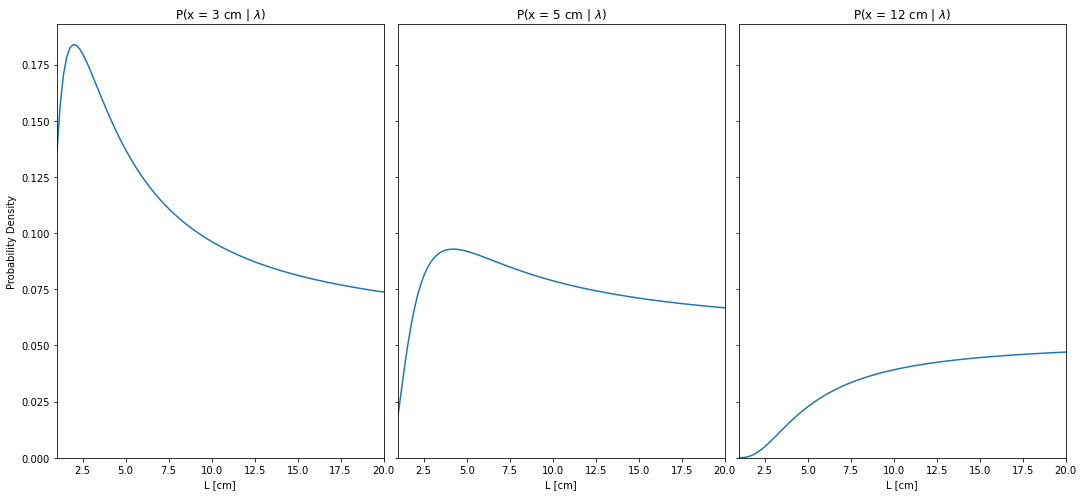

In [6]:
# Create arrays for x and L.
xs = [3, 5, 12]
L = np.linspace(a, b, num=100)

# Plot the probability desity as a function of L for each x. Label each plot.
fig, axs = plt.subplots(figsize=(15, 7), ncols=len(xs), sharex=True, sharey=True)
for ax, x in zip(axs, xs):
  lh = likelihood(x, L)
  ax.plot(L, lh)
  ax.set_title(f"P(x = {x} cm | $\\lambda$)")
  ax.set_xlabel("L [cm]")
axs[0].set_ylabel("Probability Density")
plt.tight_layout()
plt.setp(axs, xlim=(a, b), ylim=(0))
plt.show()

<span style="color:blue"> <i> 4. Plot $P(x|\lambda)$ as a function of $x$ and $\lambda$. Create a surface plot.  </i></span>

In [7]:
# Import packages for making a 3D plot
from matplotlib import cm

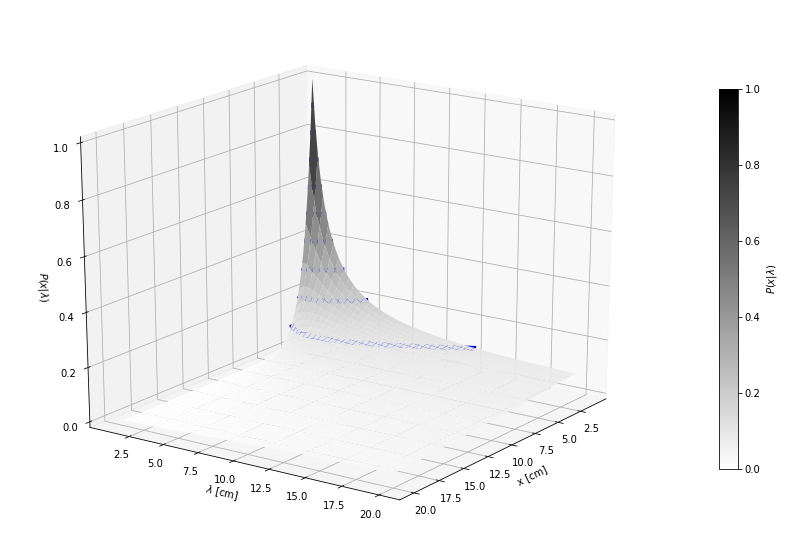

In [8]:
# Hint/suggestion:
# Create arrays for x and L. These define your "x" and "y" coordinates.
x = np.linspace(a, b, num=100)
# we plot for a < L < b since the values in pt 2 are in this range although L
# could be outside of this range theoretically:
L = np.linspace(a, b, num=100)  
# Create coordinate matrices from coordinate vectors.
x, L = np.meshgrid(x, L)

# Evaluate probability densities at all (x,y) coordinates. This is your "z" coordinate.
lh = likelihood(x, L)

# Make plot
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, L, lh, cmap=cm.gist_yarg, linewidth=0)
surf.set_clim(0, 1.)
ax.set_zlim(0, 1.)
cb = fig.colorbar(surf, shrink=0.7)
cb.set_label("$P(x|\\lambda)$")
# Add contour
plt.contour(x, L, lh, colors="blue", linewidths=5, levels=1/10*np.arange(11))
ax.set_xlabel("x [cm]")
ax.set_ylabel("$\\lambda$ [cm]")
ax.set_zlabel("$P(x|\\lambda)$", rotation=270)
ax.view_init(elev=20, azim=35)
plt.show()

**Note:** It appears unclear whether we are looking for lines of constant probability density (as shown in blue in the plot above) or the lines of constant $x$ and $\lambda$. In any case, the plot with constant values of $x$ and $\lambda$ is shown below. The red lines correspond to the constant values of $\lambda$ from pt 2 whereas the blue lines correspond to the constatn values of $x$ from part 3.

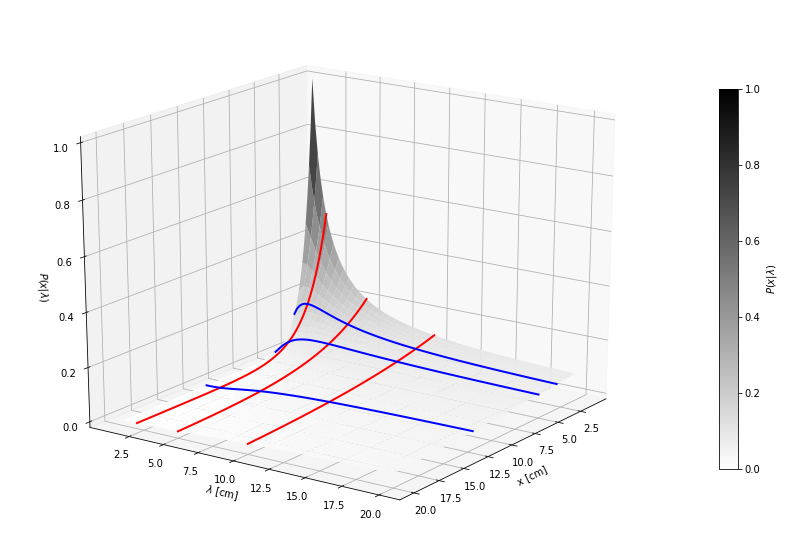

In [9]:
# Make plot
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, L, lh, cmap=cm.gist_yarg, linewidth=0)
surf.set_clim(0, 1.)
ax.set_zlim(0, 1.)
cb = fig.colorbar(surf, shrink=0.7)
cb.set_label("$P(x|\\lambda)$")
# Add contour
const_Ls = [2, 5, 10]  # constant lambda values from pt 2
for const_L in const_Ls:
  lh_L = likelihood(x[0], const_L) 
  ax.plot(x[0], lh_L, zs=const_L, zdir="y", lw=2, c="red", zorder=10)

const_xs = [3, 5, 12]  # constant x values from pt 3
for const_x in const_xs:
  lh_x = likelihood(const_x, L[:, 0]) 
  ax.plot(L[:, 0], lh_x, zs=const_x, zdir="x", lw=2, c="blue", zorder=10)

# Labels
ax.set_xlabel("x [cm]")
ax.set_ylabel("$\\lambda$ [cm]")
ax.set_zlabel("$P(x|\\lambda)$", rotation=270)
ax.view_init(elev=20, azim=35)
plt.show()

In the above figure, two contour plots (constant $x$ and $y$ slices) are also included. Compare them to the figures you created in part 2 and 3. They are the same; they correspond to vertical sections through surface.<br>

**Comparison with pt 2 and 3:**
Comparing the red lines (constant $\lambda$) with the plots in part 2 and the blue lines (constant $x$) with the plots in part 3, we can clearly see that the curves are the same.

Now write Bayes' theorem:<br>

\begin{align}
P(\lambda\ |\ \{x_1, ..., x_N\}) & = \frac{P(\{x\}|\lambda)P(\lambda)}{P(\{x\})} \\
& \propto \frac{1}{(\lambda Z(\lambda))^N}\ \mathrm{exp} \big( -\sum_1^N x_n/\lambda \big) P(\lambda)
\end{align}
<br>
<span style="color:blue"> <i> 5. Define the likelihood function $P(\{x\}|\lambda)$ and plot $P(\{x \} = \{1.5, 2, 3, 4, 5, 12\}|\lambda)$ as a function of $\lambda$. Assuming a constant prior $P(\lambda)$, estimate the peak posterior value of $\lambda$ and the error on $\lambda$ by fitting to a gaussian at the peak.  </i></span>

In [10]:
def likelihood(xs, L):
  """
  Likelihood function for a set of values of x
  """
  N = len(xs)  # number of x values
  prefactor = (L * Z(L)) ** (-N)  # factor in front of exponential
  exp = np.exp(-1 * np.sum(xs.reshape(1, -1)/L.reshape(-1, 1), axis=1))  # exponential, sum over the xs
  prod = prefactor * exp
  return prod

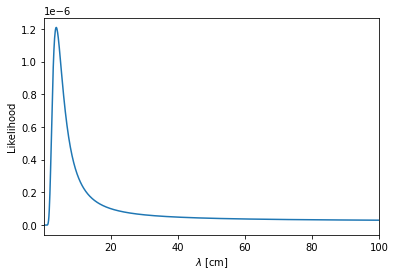

In [11]:
# Create an array for L. Assume that it is evenly spaced numbers over the interval (1e-1, 1e2).
L_arr = np.linspace(1e-1, 1e2, num=1000)
# Create an array for x.
x_arr = np.array([1.5, 2, 3, 4, 5, 12])  # values given above
# Evaluate the likelihood function and plot it as a function of L
lh = likelihood(x_arr, L_arr)
# Make plot
plt.figure()
plt.plot(L_arr, lh)
plt.xlim(L_arr.min(), L_arr.max())
plt.xlabel("$\\lambda$ [cm]")
plt.ylabel("Likelihood")
plt.show()

In [12]:
# How is the posterior related to the likelihood and the prior?

The posterior is proportional to the product of the likelihood and the prior. By Bayes' theorem, the posterior is given by: 
$$P(λ|\{x\}) ∝ P(\{x\}|\lambda) P(\lambda)$$

In [13]:
# Estimate the peak posterior value of L (Hint - https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)

"""
ANSWER:

With a flat prior (just a constant), the posterior will simply be proportional to the likelihood. Hence, the peak posterior
value of L is the same as the peak likelihood value of L.
"""


peak_L = L_arr[np.argmax(lh)]
print("The peak posterior value of L is approximately {:.1f} cm.".format(peak_L))


# Note: the uncertainty on this value should scale with how finely we sampled L. 
dl = L_arr[1] - L_arr[0]
print("The uncertainty on this value is of order {:.1g} cm.".format(dl))

The peak posterior value of L is approximately 3.7 cm.
The uncertainty on this value is of order 0.1 cm.


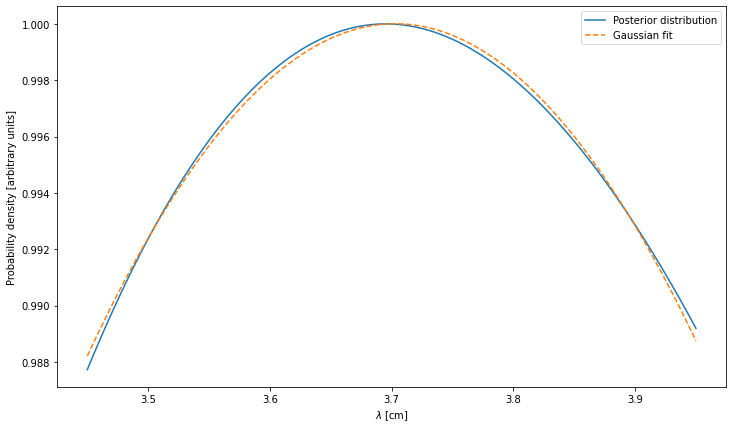

In [14]:
# Estimate the error on L  by fitting to a gaussian at the peak
# Import packages for curve fitting
from scipy.optimize import curve_fit
# Create an array of L near L_max
DL = 0.25  # the interval half width in cm
# make an interval around peak of width .5 cm
L_interval = np.linspace(peak_L-DL, peak_L+DL, num=101)
# Define Gaussian function with arbitrary amplitude (See https://en.wikipedia.org/wiki/Normal_distribution)

def gauss(l, amp, mean, sigma):
  """
  Gaussian as a function of l.
  """
  return amp * np.exp(-(l-mean)**2 / (2*sigma**2))

# Fit a Gaussian function to a data
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
# You can use different packages if you wish. This is only a suggestion.
ydata = likelihood(x_arr, L_interval)
par, cov = curve_fit(gauss, L_interval, ydata)

# Plot both data and fit

"""
The values on the y-axis are arbitrary anyway (since we didn't normalize the posterior)
so we might as well shift them to be close to 1 on the plot
here, they show the probability density relative to the peak probability density
"""

plt.figure(figsize=(12, 7))
plt.plot(L_interval, ydata/ydata.max(), label="Posterior distribution")
plt.plot(L_interval, gauss(L_interval, *par)/ydata.max(), ls="--", label="Gaussian fit")
plt.legend()
plt.xlabel("$\\lambda$ [cm]")
plt.ylabel("Probability density [arbitrary units]")
plt.show()

In [15]:
# The fit gives a value with error for the peak posterior value of L
L_max_fit = par[1]
L_max_err = np.sqrt(cov[1, 1])  # square root of variance

print("The best fit peak posterior value of L is {:.4f} cm with error {:.1g} cm.".format(L_max_fit, L_max_err))

The best fit peak posterior value of L is 3.7030 cm with error 0.0003 cm.


<span style="color:blue"> <i> 6. Let's say that it was previously believed that the characteristic length $\lambda$ were $3.5\pm2.0$. Modelling this prior $P(\lambda)$ belief with a Gaussian distribution, write a new function that returns the posterior function for this dataset (up to $\lambda$-independent normalization). Allow this function to take general mean and standard deviation of the prior in order to do the last part of this problem. Use this function to estimate the new peak posterior value of $\lambda$. </i></span>

In [16]:
# Write a new posterior function for this dataset (up to lambda-independent normalization)
# This should take the mean and standard deviation of the prior as input.

def prior(l, mean, sigma):
  """
  Gaussian prior
  """
  amp = 1 / (sigma * np.sqrt(2*np.pi))  # amplitude of normalized gaussian
  return gauss(l, amp, mean, sigma)  # use previously defined gaussian function

def posterior(l, mean_prior, sigma_prior, xs=[1.5, 2, 3, 4, 5, 12]):
  """
  Posterior distribution (up to normalization) given the mean and standard dev.
  of the prior and the measured x values from earlier.
  """
  return likelihood(np.array(xs), l) * prior(l, mean_prior, sigma_prior)

# Using the given prior belief, determine the maximum:
post = posterior(L_arr, 3.5, 2.)
peak_L = L_arr[np.argmax(post)]
print("The new peak posterior value of L is approximately {:.2f} cm.".format(peak_L))

The new peak posterior value of L is approximately 3.60 cm.


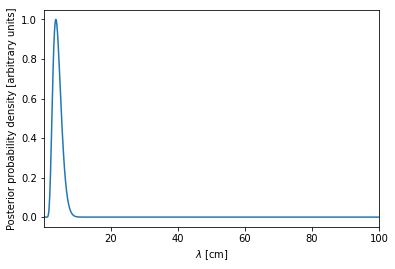

In [17]:
plt.figure()
plt.plot(L_arr, post/post.max())  # might as well make close to 1 since units are arbitrary
plt.xlim(L_arr.min(), L_arr.max())
plt.xlabel("$\\lambda$ [cm]")
plt.ylabel("Posterior probability density [arbitrary units]")
plt.show()

<span style="color:blue"> <i> 7. Determine the limiting behavior of this new peak posterior value as the uncertainty on the prior belief goes to zero and as it goes to infinity by evaluating this peak posterior value for uncertainties of 1e-3 and 1e3. </i></span>

In [18]:
# Determine maximum posterior value of lambda for uncertainty of 1e-3
post = posterior(L_arr, 3.5, 1e-3)
peak_L = L_arr[np.argmax(post)]
print("The peak posterior value of L with small uncertainty on prior value is approximately {:.2f} cm.".format(peak_L))


# Determine maximum posterior value of lambda for uncertainty of 1e3
post = posterior(L_arr, 3.5, 1e3)
peak_L = L_arr[np.argmax(post)]
print("The new peak posterior value of L great uncertainty on prior value is approximately {:.2f} cm.".format(peak_L))

The peak posterior value of L with small uncertainty on prior value is approximately 3.50 cm.
The new peak posterior value of L great uncertainty on prior value is approximately 3.70 cm.


<span style="color:blue"> <i> 8. Why should we expect these values?
   </i></span>

<span style="color:blue"> <i> Answer: </i></span><br>

***

In the first case, our prior belief is strongly peaked. We are claiming that we already know $\lambda$ to good precision and have high confidence in the value 3.5cm. Our prior belief is that a value of 3.7cm is extremely unlikely (200 standard deviations). It takes more than 5 new measurements (which are peaked at 3.7cm according to our previous value) for us to change our belief that the correct value is 3.5 cm.


In the second case we have very small confidence in our prior value of 3.5cm. We're saying that there's about 2/3 chance the value differs from that by at most 1000cm and 1/3 chance it differs even more. This is essentially a flat prior in the parameter space we are exploring and so we are very sensitive to new measurements. Since the likelihood is peaked at 3.7 cm, we readily accept this new value as the most probable. (We note that this value is the same we got in the previous problem when we actually used a flat prior.)

#### Problem 2 - Biased Coin

When spun on edge 256 times, a Belgian one-euro coin came up heads 142 times and tails 114. Do these data give evidence that the coin is biased rather than fair? <br>
<br>
We compare the models $\mathcal{H}_0$ - the coin is fair - and $\mathcal{H}_1$ - the coin is biased. <br>
<br>
First, suppose that the model $\mathcal{H}_1$ assumes a uniform prior distribution for $p$ (the probability of getting heads in a single toss): $P(p|\mathcal{H}_1) = 1$. <br>
<br>
Let the data $D$ be a sequence which contains counts of the two possible outcomes (H - head / T - tail): e.g. HHTHT, HHHTTHTT, etc. <br>
<br>
Given a particular $p$, the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails is:
$$ P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}. $$
<br>
Then,
$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ p^{F_H} (1-p)^{F_T} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} .$$
Note that the above integral is a "Beta function" $B(F_H+1, F_T+1)$ and can be written in terms of the gamma function. (See http://www.math.uah.edu/stat/special/Beta.html) <br>
<br>
The gamma function is an extension of the factorial function $\Gamma(n+1) = n!$ <br> <br>
$$ \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} = \frac{F_H! F_T!}{(F_H+F_T+1)!} $$
<br>
Similarly,
$$ P(D|\mathcal{H}_0) = \big(\frac{1}{2}\big)^F. $$
<br>
<span style="color:blue"> <i> 1. Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the uniform prior of $\mathcal{H}_1$. Which model does the data favor?</i></span> <br>
<br>
(Hint: If the argument of the gamma function is large, math.gamma() overflows. You can prevent this by using the fact:
$$ log(xy/z) = log(x)+log(y)-log(z) $$ <br>
Then, you can evaluate $P = \Gamma(x)*\Gamma(y)/\Gamma(z)$ in the following way:
$$ Q = log(P) = log(\Gamma(x))+log(\Gamma(y))-log(\Gamma(z)) $$
$$ P = e^Q $$
<br>
You can easily evaluate logarithm of the gamma function using "lgamma" (from math import lgamma) see https://docs.python.org/2/library/math.html)<br>
<br>
(Hint2: For reference, you can read: https://en.wikipedia.org/wiki/Bayes_factor)

In [19]:
from scipy.special import gammaln  # scipy version of loggamma

# observed outcomes
N_HEADS = 142
N_TAILS = 114

def lh_h0(n_heads, n_tails):
  """
  Likelihood of data given null hypothesis with n_heads heads and n_tails tails.
  """
  F = n_heads + n_tails
  return 1 / 2**F

def lh_h1(n_heads, n_tails):
  """
  Likelihood of data given H1 hypothesis with n_heads heads and n_tails tails.
  We use the trick described above with taking the log first.
  """
  Q = gammaln(n_heads+1) + gammaln(n_tails+1) - gammaln(n_heads+n_tails+2)
  return np.exp(Q)


# bayes factor
bf = lh_h1(N_HEADS, N_TAILS) / lh_h0(N_HEADS, N_TAILS)
print(bf)

0.3600892135186402


**ANSWER:** The likelihood ratio is 0.36. This indicates that the null hypothesis is favored, but not strongly.

Instead of assuming a uniform prior, suppose that we add a small bias, and consequently the prior were presciently set: <br>
$$ P(p|\mathcal{H}_1, \alpha) = \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1},\ \  \mathrm{where}\ \ Z(\alpha) = \Gamma(\alpha)^2/\Gamma(2\alpha) $$
<br>
<span style="color:blue"> <i> 2. Calculate the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the above prior of $\mathcal{H}_1$. Let $\alpha$ = \{ .37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096 \}. </i></span><br>


<span style="color:blue"> <i> Answer: write down the analytic expression of $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$. Show your work here. </i></span>

We need to write down the likelihood $P(D|\mathcal{H}_1)$. We know $P(D|p, \mathcal{H}_1)$ and $P(p|\mathcal{H}_1, \alpha)$. Here $\alpha$ is a fixed parameter. Thus, we need to marginalize over $p$:
$$P(D|\mathcal{H}_1) = \int_0^1 dp P(D|p, \mathcal{H}_1) P(p|\mathcal{H}_1, \alpha)$$
$$P(D|\mathcal{H}_1) = \int_0^1 dp\, p^{F_H} (1-p)^{F_T} \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1}$$
$$P(D|\mathcal{H}_1) = \frac{1}{Z(\alpha)} \int_0^1 dp\, p^{F_H+\alpha-1} (1-p)^{F_T+\alpha-1}$$

This is the same integral as before, hence:
$$P(D|\mathcal{H}_1) = \frac{1}{Z(\alpha)} \frac{\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(F_H+F_T+2\alpha)}$$

Therefore, the likelihood ratio in this case is given by:
$$\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}=2^F \frac{1}{Z(\alpha)} \frac{\Gamma(F_H+\alpha)\Gamma(F_T+\alpha)}{\Gamma(F_H+F_T+2\alpha)}$$

[0.18681219 0.36008921 0.62087319 0.98630285 1.38356857 1.60377402
 1.491457   1.26051209 1.11066532]


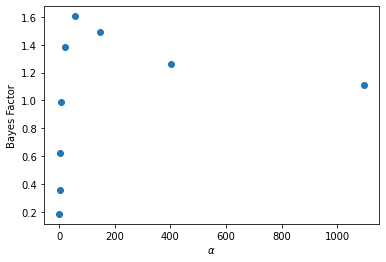

In [20]:
def lh_h1_biased(n_heads, n_tails, alpha):
  """
  Likelihood of data given H1(alpha) hypothesis with n_heads heads and n_tails tails.
  We use the trick described above with taking the log first. Since we have an
  extra factor of 1/Z in this case, we get P = exp(Q - logZ) instead of P = exp(Q).
  """
  Q = gammaln(n_heads+alpha) + gammaln(n_tails+alpha) - gammaln(n_heads+n_tails+2*alpha)
  logZ = 2*gammaln(alpha) - gammaln(2*alpha)  # log Z(alpha) 
  return np.exp(Q - logZ)

def bayes_factor(alpha):
  """
  Compute the likelihood ratio between likelihoods of the H1(alpha) and H0 hypotheses
  """
  bf = lh_h1_biased(N_HEADS, N_TAILS, alpha) / lh_h0(N_HEADS, N_TAILS)
  return bf


alphas = np.array([.37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096])
bf_alpha = bayes_factor(alphas)
print(bf_alpha)

plt.figure()
plt.scatter(alphas, bf_alpha)
plt.xlabel("$\\alpha$")
plt.ylabel("Bayes Factor")
plt.show()

<span style="color:blue"> <i> 3. Does the likelihood ratio for $\mathcal{H}_1$ over $\mathcal{H}_0$ increases as $\alpha$ increases? </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br> 

The likelihood ratio initially increases with $\alpha$ and peaks for $\alpha=55$ (of the points we sampled). It then decreases but appears to plateau close to 1 for large values of $\alpha$. This makes sense if we consider the likelihood $P(D|\mathcal{H}_1)$ that we computed above, which gave us the same integral as when we used a uniform prior but with the substitution $F_H → F_H + \alpha -1 $ and $F_T → F_T + \alpha -1 $. That is, with the biased prior, the effect of $\alpha$ is that we had $\alpha-1$ more observations of both heads and tails. Since both heads and tails increase by the same amount, the difference in observed outcomes gets relatively smaller. For example, with a uniform prior we had 142 heads and 114 tails; a biased prior with $\alpha=1096$ is the same as a uniform prior but with 1237 heads and 1209 tails. It is clear that in the second case, the likelihood is much closer to the null hypothesis than for a small value of $\alpha$. And as $\alpha$ goes to infinity, the likelihoods of the two hypotheses are the same.

<span style="color:blue"> <i> 4. Now, let $\mathcal{H}_1$ be the model in which the probability of getting heads is descrete at 142/256. What is the likelihood in this case? </i></span><br>

We had $P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}$. In this case, $p=142/256$. In the language used in the earlier parts of this problem, our prior $P(p|\mathcal{H}_1)$ is a delta function centered at 142/256. Using $F = F_H + F_T$, we see that $p=F_H/F$ and 
$$P(D|p,\mathcal{H}_1) = (F_H/F)^{F_H} (1-F_H/F)^{F_T}= (F_H/F)^{F_H} (F_T/F)^{F_T} = \frac{F_H^{F_H} F_T^{F_T}}{F^F}.$$

In [21]:
p = 142/256
lh = p ** N_HEADS * (1-p) ** N_TAILS
print(lh)

print(lh / lh_h0(N_HEADS, N_TAILS))  # bayes factor

4.0055931427849106e-77
4.638159986377322


<span style="color:blue"> <i> 5. Explain the above result. </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br> 
The likelihood is about 4.6 times greater than that of the null hypothesis, but still very small. The reason is that the likelihood as written does not account for all the different ways that 142 heads can be drawn from 256 coin flips (that would require a factor of (n choose k) which turns out to be order $10^{75}$ in this case). Since we are talking about likelihoods of a specific order of heads and tails, it is naturally extremely small. However, since the value of $p$ is chosen to exactly match the observed result, this is obviously the max likelihood we can achieve and explains why the Bayes factor is >1. 

In [22]:
from scipy.special import comb  # n choose k
comb(256, 142)

1.251225694897044e+75

<span style="color:blue"> <i> 6. Now let us test the null hypothesis. Assuming the central limit theorem, we model the binomial as a gaussian centered at $\mu = F/2$ and with the width given by $\sigma^2 = F*(p_{heads})*(p_{tails})$. (in this case, $p_{heads} = p_{heads} = 1/2$) </i></span><br>

In [23]:
mean = (N_HEADS + N_TAILS) / 2
var = (N_HEADS + N_TAILS) * (1/2)**2
sigma = np.sqrt(var)

# if the null hypothesis is correct, we would expect N_TAILS and N_HEADS to be drawn from
# the Gaussian distribution

diff = np.abs(mean - N_HEADS)  # difference from mean
diff /= sigma   # put the difference in units of standard deviations

print("The observed result is {:.2f} standard deviations away from the mean.".format(diff))


# the integral of the gaussian distribution gives the cumulative density function
from scipy.special import erf   # error function

def cdf_gauss(n_heads, mean, sigma):
  z = (n_heads - mean) / sigma
  return 1/2 * (1 + erf(z / np.sqrt(2)))

"""
We calculate the chance of getting a more extreme result than we did by computing
the cumulative probability of the observed number of heads. A more extreme result would be one with a greater
absolute value of difference from the mean than the observed. Since the Gaussian is symmetric we can simply double
the probability of observing a larger number of heads than we did (we do larger instead of smllaer since the observed number of heads is greater than the mean)
"""

cp = cdf_gauss(N_HEADS, mean, sigma)  # cumulative probability, i.e. chance of observing fewer heads than we did
x = 1 - cp  # chance of observing more heads than we did
x *= 2  # multiply by 2 to get account for chance of getting a more extreme result in the case of very few heads

print("Given the null hypothesis, there was a {:.1g}% chance of observing the number of heads we did or something more extreme.".format(x*100))
print("In other words, the p-value is {:.1g}.".format(x))

The observed result is 1.75 standard deviations away from the mean.
Given the null hypothesis, there was a 8% chance of observing the number of heads we did or something more extreme.
In other words, the p-value is 0.08.


Since the observed outcome has a p-value of 0.08 -- not even 2 standard deviations removed from the mean -- we do not have conclusive evidence for rejecting the null hypothesis. An 8% chance of the given outcome is not extreme enough to reject the null hypothesis. This is in line with the Bayes factor we computed earlier that showed that the ratio between the maximum likelihood and the null hypothesis likelihood is 4.6, which is not a strong claim for preferring one hypothesis over the other.

***

#### Problem 3 - Monty Hall

On a game show, a contestant is told the rules as follows: <br>
<br>
There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.<br>
<br>
At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.<br>
<br>
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 2, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 3, or (c) does it make no difference?

Let $\mathcal{H}_i$ denote the hypothesis that the prize is behind door $i$. We make the following assumptions: the three hypotheses $\mathcal{H}_1, \mathcal{H}_2, \mathcal{H}_3$ are equiprobable a <i>priori</i>, i.e., <br>
<br>
$$ P(\mathcal{H}_1) = P(\mathcal{H}_2) = P(\mathcal{H}_3) = \frac{1}{3} $$
<br>
The datum we receive, after choosing door 1, is one of $D$ = 3 and $D$ = 2 (meaning door 3 or 2 is opened, respectively).<br>
<span style="color:blue"> <i> 1. Find $P(D=2|\mathcal{H}_1), P(D=3|\mathcal{H}_1), P(D=2|\mathcal{H}_2), P(D=3|\mathcal{H}_2), P(D=2|\mathcal{H}_3), P(D=3|\mathcal{H}_3)$. </i></span><br>

<span style="color:blue"> <i> Answer: </i></span><br>
If we choose door 1 and the prize is in door 1, there is an equal chance that D=2 or D=3 since it does not matter which door the host opens (both 2 and 3 have no prize):
$$P(D=2|\mathcal{H}_1)=P(D=3|\mathcal{H}_1)=\frac{1}{2}$$

If the prize is in door 2 and we choose door 1 then the host has to open door 3. Similarly, if the prize is behind door 3, the host has to open door 2.

$$P(D=2|\mathcal{H}_2)=P(D=3|\mathcal{H}_3)=0 \\ P(D=2|\mathcal{H}_3)=P(D=3|\mathcal{H}_2)=1$$

Now, using Bayes’ theorem, we evaluate the posterior probabilities of the hypotheses:<br>
$$ P(\mathcal{H}_i|D=2) = \frac{P(D=2|\mathcal{H}_i)P(\mathcal{H}_i)}{P(D=2)} $$ <br>
<br>
<span style="color:blue"> <i> 2. First, we need to calculate the normalizing constant (denominator). Find $P(D=2), P(D=3)$ </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>

Since the problem is symmetric in doors 2 and 3, we obviously need $P(D=2) = P(D=3)$. Moreover, we know that door 1 will not be opened since we chose door 1 so $P(D=1)=0$. Hence, $P(D=2)=P(D=3)=1/2$.

Alternatively we can expand the probabilities in terms of the conditional probabilities of each hypothesis being right:

$$P(D=2) = P(D=2|\mathcal{H_1})P(\mathcal{H_1}) + P(D=2|\mathcal{H_2})P(\mathcal{H_2}) + P(D=2|\mathcal{H_3})P(\mathcal{H_3}) = \frac{1}{3} \left(\frac{1}{2} + 0 + 1\right) = \frac{1}{2}$$

$$P(D=3) = P(D=3|\mathcal{H_1})P(\mathcal{H_1}) + P(D=3|\mathcal{H_2})P(\mathcal{H_2}) + P(D=3|\mathcal{H_3})P(\mathcal{H_3}) = \frac{1}{3} \left(\frac{1}{2} + 1 + 0\right) = \frac{1}{2}$$


<span style="color:blue"> <i> 3. Evaluate the posterior probability and argue if the contestant should switch to door 3. <br>



<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>

We picked door 1 and the host opened door 2. We want to compare the probability of $\mathcal{H}_1$ and $\mathcal{H}_3$ given this.

$$P(\mathcal{H}_1 | D=2) = \frac{P(D=2 | \mathcal{H}_1) P(\mathcal{H}_1)}{P(D=2)} = \frac{\frac{1}{2} \cdot \frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}$$

We know that the prize is not behind door 2 so $P(\mathcal{H}_3 | D=2) = 1 - 1/3 = 2/3$.

The contestant should switch to door 3 since the probability of getting the prize is twice as large in that case.

<br>Alternatively, you can perform a thought experiment in which the game is played with 100 doors. The rules are now that the contestant chooses one door, then the game show host opens 98 doors in such a way as not to reveal the prize, leaving the contestant’s selected door and one other door closed. The contestant may now stick or switch. Where do you think the prize is? </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>
The contestant should switch again. The chance of getting it right initially was only 1/100 and opening doors do not change that. The door they can switch to however, has 99/100 chance.

***
Imagine that the game happens again and just as the gameshow host is about to open one of the doors a violent earthquake rattles the building and one of the three doors flies open. It happens to be door 3, and it happens not to have the prize behind it. The contestant had initially chosen door 1.<br><br>
Repositioning his toupee, the host suggests, ‘OK, since you chose door 1 initially, door 3 is a valid door for me to open, according to the rules of the game; I’ll let door 3 stay open. Let’s carry on as if nothing happened.’
Should the contestant stick with door 1, or switch to door 2, or does it make no difference? Assume that the prize was placed randomly, that the gameshow host does not know where it is, and that the door flew open because its latch was broken by the earthquake.<br><br>
[A similar alternative scenario is a gameshow whose confused host forgets the rules, and where the prize is, and opens one of the unchosen doors at random. He opens door 3, and the prize is not revealed. Should the contestant choose what’s behind door 1 or door 2? Does the optimal decision for the contestant depend on the contestant’s beliefs about whether the gameshow host is confused or not?]

***
If door 3 is opened by an earthquake, the inference comes out differently – even though visually the scene looks the same. The nature of the data, and the probability of the data, are both now different. The possible data outcomes are, firstly, that any number of the doors might have opened. We could label the eight possible outcomes <b>d</b> = (0,0,0),(0,0,1),(0,1,0),(1,0,0),(0,1,1),...,(1,1,1). <br><br>
Secondly, it might be that the prize is visible after the earthquake has opened one or more doors. So the data $D$ consists of the value of <b>d</b>, and a statement of whether the prize was revealed. It is hard to say what the probabilities of these outcomes are, since they depend on our beliefs about the reliability of the door latches and the properties of earthquakes, but it is possible to extract the desired posterior probability without naming the values of $P($<b>d</b>$|\mathcal{H}_i)$ for each <b>d</b>. <br><br>
All that matters are the relative values of the quantities $P(D|\mathcal{H}_1)$, $P(D|\mathcal{H}_2)$, $P(D|\mathcal{H}_3)$, for the value of $D$ that actually occurred. The value of $D$ that actually occurred is ‘<b>d</b> = (0, 0, 1), and no prize visible’.

<span style="color:blue"> <i> 4. How does $P(D|\mathcal{H}_1)$ compare with $P(D|\mathcal{H}_2)$? What is $P(D|\mathcal{H}_3)$? Find $P(D|\mathcal{H}_1)/P(D)$ and $P(D|\mathcal{H}_2)/P(D)$. </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>

Interpreting $D$ as "Door 3 was opened randomly and didn't happen to have the prize", it is clear that $P(D|\mathcal{H}_3) = 0$ (obviously, if the prize was there then $D$ could not have happened). Critically, the problem is now symmetric in doors 1 and 2 since the earthquake might as well have opened door 1, unlike the host who would never open door 1. Hence, $P(D|\mathcal{H}_1) = P(D|\mathcal{H}_2)$.

We can expand $P(D)$ in terms of the conditional probabilities:
$$P(D) = P(D|\mathcal{H}_1)P(\mathcal{H}_1) + P(D|\mathcal{H}_2)P(\mathcal{H}_2)+ P(D|\mathcal{H}_3)P(\mathcal{H}_3) = P(D|\mathcal{H}_1)P(\mathcal{H}_1) + P(D|\mathcal{H}_2)P(\mathcal{H}_2)$$
$$P(D) = P(D|\mathcal{H}_1) (P(\mathcal{H}_1) + P(\mathcal{H}_2)) = \frac{2}{3}P(D|\mathcal{H}_1)$$
$$\frac{P(D|\mathcal{H}_1)}{P(D)} = \frac{P(D|\mathcal{H}_2)}{P(D)} = \frac{3}{2}$$

<span style="color:blue"> <i>  5. Evaluate the posterior probability and argue if the contestant should switch. </i></span><br>

<span style="color:blue"> <i> Answer: (Do not just write down numbers. Show your work.) </i></span><br>


We need to compare $P(\mathcal{H}_1|D)$ with $P(\mathcal{H}_2|D)$. But as argued above, the earthquake knows nothing about the contestant originally choosing door 1. It should therefore be the case that the relative probabilities between $\mathcal{H}_1$ and $\mathcal{H}_2$ do not change when D happens (the likelihood of D is the same in both cases). Mathematically, we expect that:
$$\frac{P(\mathcal{H}_1|D)}{P(\mathcal{H}_2|D)} = \frac{P(\mathcal{H}_1)}{P(\mathcal{H}_2)}.$$

We confirm this with Bayes' theorem below.

$$P(\mathcal{H}_1|D) = \frac{P(D|\mathcal{H}_1) P(\mathcal{H}_1)}{P(D)}$$
$$P(\mathcal{H}_2|D) = \frac{P(D|\mathcal{H}_2) P(\mathcal{H}_2)}{P(D)}$$

We know that $P(\mathcal{H}_1) = P(\mathcal{H}_2) = 1/3$ and have shown above that 
$$\frac{P(D|\mathcal{H}_1)}{P(D)} = \frac{P(D|\mathcal{H}_2)}{P(D)} = \frac{3}{2}.$$

We therefore conclude that the posterior probabilities are $P(\mathcal{H}_1|D) = P(\mathcal{H}_2|D) = 1/2$. It does not matter if the contestant switches doors.

***